In [1]:
import re
import json
import uuid
import glob
import pickle
import sys
import os
import math
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.cluster import KMeansClusterer, euclidean_distance
from numpy import array
from pprint import pprint
import re
import scipy.stats as stat
from os.path import basename
import string
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('agg')
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import operator
from nltk import stem
from nltk.stem.snowball import *
from nltk.stem import PorterStemmer
import datetime
import time
from pprint import pprint
from gensim.corpora.dictionary import Dictionary

%matplotlib inline
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy
import os

# Enable logging for gensim - optional
import logging
logging.basicConfig(filename='lda_model_Mommit.log',format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")


def Tokinization(document):
    document = "".join(document)
    tokenizer = RegexpTokenizer(r'\w+')
    intermediate = tokenizer.tokenize(document)
    return intermediate


In [2]:
df= pd.read_pickle('Parenting_cleaned.pkl')

In [3]:
#Creating a Mommit Data Frame
Mommit = df[df['subreddit']=='Mommit']

In [4]:
print('reading the Mommit Cleaned dataframe...')
print('*' * 50)
print('and for a test...')
print(Mommit.clean_body.head())
print('*' * 50)

reading the Mommit Cleaned dataframe...
**************************************************
and for a test...
1038051                                                 love
1038053                                                 weed
1038054    use money buy babi gift basket call stork bask...
1038057    throw plan go sure could get pregnant first mo...
1038058    go start tri get pregnant month someth beyond ...
Name: clean_body, dtype: object
**************************************************


In [5]:
print('grouping into dcouments')
CompleteThread = []
CompleteThread = Mommit.groupby('link_id')['clean_body'].apply(list)
#running for the rest of the data
processed_threads = []
#creating threads for each of the users
for thread in CompleteThread:
    #Preprocessing each of the threads
    processed_threads.append(Tokinization(thread))

grouping into dcouments


In [6]:
texts = processed_threads
print('The length of the documents is...')
print(len(texts))
print('*' * 50)
print('the first document is...')
print(texts[0])
print('*' * 50)

print('buiding the dictionary...')
dictionary = corpora.Dictionary(texts)
dictionary.save('MommitDictionary.dict')
print(dictionary[0])

print('building the corpus')
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('MommitCorpusFinal.mm', corpus)
print(corpus[0])

The length of the documents is...
17399
**************************************************
the first document is...
['childless', 'choic', 'year', 'still', 'especi', 'fond', 'peopl', 'kid', 'kind', 'hard', 'like', 'believ', 'readi', 'tri', 'child', 'eight', 'year', 'fantast', 'support', 'partner', 'knew', 'would', 'great', 'dad', 'want', 'kid', 'badli', 'never', 'heartbroken', 'feel', 'readi', 'mom', 'daughter', 'decis', 'made', 'lightli', 'scare', 'throughout', 'entir', 'pregnanc', 'would', 'aw', 'parent', 'mess', 'littl', 'three', 'seem', 'pretti', 'wellmet', 'husband', 'bare', 'went', 'whirlwind', 'romanc', 'involv', 'lot', 'sex', 'never', 'care', 'thank', 'pass', 'std', 'hiv', 'test', 'told', 'kid', 'born', 'hypospadia', 'googl', 'risk', 'pco', 'know', 'time', 'continu', 'use', 'protect', 'total', 'four', 'year', 'went', 'diet', 'exercis', 'regim', 'lost', 'pound', 'start', 'ovul', 'boom', 'got', 'pregnant', 'unexpectedli', 'alway', 'said', 'okay', 'never', 'kid', 'thought', 'secre

limit_output extension: Maximum message size of 10000 exceeded with 11602 characters

In [7]:
print('reading all LDA models....')
print('*' * 50)

model_list =  []

coherence_values = []

for i in range(0, len(model_list)):
    print('now working on coherence value for model...')
    print(model_list[i])
    print('*' * 50)
    coherencemodel = CoherenceModel(model=model_list[i], texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

reading all LDA models....
**************************************************


In [8]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [9]:
from gensim.models import LdaModel
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=10, limit=100, step=10)

/Users/tammari/Desktop/DaskTest/env/lib/python3.6/site-packages/scipy/sparse/lil.py:504: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/Users/tammari/Desktop/DaskTest/env/lib/python3.6/site-packages/scipy/sparse/lil.py:506: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


In [10]:
limit = 100
start = 10
step  = 10    

x = range(start, limit, step)
coherence = zip(x, coherence_values)
sorted_coherence = sorted(coherence, key=lambda x: x[1], reverse=True)

print(sorted_coherence)
print('*' * 50)

for m, cv in sorted_coherence:
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
print('saving list...')
print('*' * 50)
with open("Mommit_cohere.pkl", "wb") as fp: 
    pickle.dump(sorted_coherence, fp)
    
print('creating a graph of the coherence model...')
print('*' * 50)

# Show graph
fig = plt.gcf()
limit=limit; start=start; step=step;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
fig.savefig('Mommit_LDA_models_coherence.png')

[(50, 0.3723073201834858), (60, 0.3584696938337278), (80, 0.35344258290129604), (30, 0.3527240830563468), (70, 0.3451880728465597), (90, 0.3434842602732379), (40, 0.3371560677325858), (20, 0.3279863377063672), (10, 0.29906741373226675)]
**************************************************
Num Topics = 50  has Coherence Value of 0.3723
Num Topics = 60  has Coherence Value of 0.3585
Num Topics = 80  has Coherence Value of 0.3534
Num Topics = 30  has Coherence Value of 0.3527
Num Topics = 70  has Coherence Value of 0.3452
Num Topics = 90  has Coherence Value of 0.3435
Num Topics = 40  has Coherence Value of 0.3372
Num Topics = 20  has Coherence Value of 0.328
Num Topics = 10  has Coherence Value of 0.2991
saving list...
**************************************************
creating a graph of the coherence model...
**************************************************


In [11]:
for i in range(0,len(model_list)):
    model_list[i].save('Mommit_Model'+str(i)+".model")

In [9]:
limit = 100
start = 10
step  = 10  

with open('Mommit_cohere.pkl', 'rb') as f:
    coherence_values = pickle.load(f)
    
#x = range(start, limit, step)
coherence = zip(x, coherence_values)
sorted_coherence = sorted(coherence, key=lambda x: x[1], reverse=True)

fig = plt.gcf()
limit=limit; start=start; step=step;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
fig.savefig('Mommit_LDA_models_coherence_new.png')

In [11]:
with open('Mommit_cohere.pkl', 'rb') as f:
    coherence_values = pickle.load(f)

In [21]:
df = pd.DataFrame.from_records(coherence_values, columns =['Topics', 'Coherence']) 

In [40]:
df = df.sort_values(by='Topics')

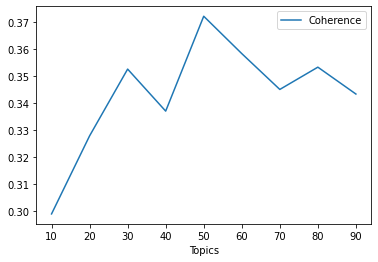

In [41]:
df.plot(x ='Topics', y='Coherence', kind = 'line')
plt.show()

# Finding topic distributions accross df

In [51]:
#load LDA model
from gensim.models import LdaModel
from gensim import corpora, models
from gensim.corpora import Dictionary
optimal_model = LdaModel.load('Mommit_Model2.model')
dictionary = corpora.Dictionary.load('MommitDictionary.dict')
corpus = corpora.MmCorpus('MommitCorpusFinal.mm')

In [14]:
#First, get a list of posts, one by one
df = Mommit.copy()
processed_posts = []
CompletePosts = df['clean_body'].apply(list)
#running for the rest of the data
processed_posts = []
#creating threads for each of the users
for post in CompletePosts:
    #Preprocessing each of the threads
    processed_posts.append(Tokinization(post))

In [15]:
new_doc2bow = [dictionary.doc2bow(post) for post in processed_posts]

vector = optimal_model.get_document_topics(new_doc2bow)

#create a list of dictioaries for scores relating to optimum LDA
newdictlist = []
for i in range(0, len(vector)):
    newdictlist.append(dict(vector[i]))

topic_bow = pd.DataFrame(newdictlist)

topic_bow.fillna(0, inplace=True)

topic_bow.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,...,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.516661,0.016667,0.016667,0.016667
1,0.016716,0.016716,0.016716,0.016716,0.016716,0.016716,0.016716,0.016716,0.016716,0.016716,...,0.016716,0.016716,0.016716,0.016716,0.016716,0.016716,0.016716,0.515248,0.016716,0.016716
2,0.337924,0.000000,0.000000,0.136841,0.285222,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.096524,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.399332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.181776,0.354468
4,0.185182,0.032161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.146884,0.000000,0.088150,0.170045


In [16]:
topic_bow.columns = ['Topic__' + str(col) for col in topic_bow.columns]

In [17]:
topic_bow.head()

,Topic__0,Topic__1,Topic__2,Topic__3,Topic__4,Topic__5,Topic__6,Topic__7,Topic__8,Topic__9,...,Topic__20,Topic__21,Topic__22,Topic__23,Topic__24,Topic__25,Topic__26,Topic__27,Topic__28,Topic__29
0,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,...,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.516661,0.016667,0.016667,0.016667
1,0.016716,0.016716,0.016716,0.016716,0.016716,0.016716,0.016716,0.016716,0.016716,0.016716,...,0.016716,0.016716,0.016716,0.016716,0.016716,0.016716,0.016716,0.515248,0.016716,0.016716
2,0.337924,0.000000,0.000000,0.136841,0.285222,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.096524,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.399332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.181776,0.354468
4,0.185182,0.032161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.146884,0.000000,0.088150,0.170045


In [18]:
Mommit.reset_index(drop=True, inplace=True)
topic_bow.reset_index(drop=True, inplace=True)
MizoFrame = pd.concat([Mommit, topic_bow], axis=1)

In [19]:
MizoFrame.columns.values

array(['archived', 'author', 'author_flair_css_class',
       'author_flair_text', 'body', 'controversiality', 'created_utc',
       'distinguished', 'downs', 'edited', 'gilded', 'link_id', 'name',
       'parent_id', 'removal_reason', 'score', 'score_hidden',
       'subreddit', 'ups', 'Throwaway_User', 'Throwaway_Body',
       'Throwaway', 'clean_body', 'Topic__0', 'Topic__1', 'Topic__2',
       'Topic__3', 'Topic__4', 'Topic__5', 'Topic__6', 'Topic__7',
       'Topic__8', 'Topic__9', 'Topic__10', 'Topic__11', 'Topic__12',
       'Topic__13', 'Topic__14', 'Topic__15', 'Topic__16', 'Topic__17',
       'Topic__18', 'Topic__19', 'Topic__20', 'Topic__21', 'Topic__22',
       'Topic__23', 'Topic__24', 'Topic__25', 'Topic__26', 'Topic__27',
       'Topic__28', 'Topic__29'], dtype=object)

In [20]:
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets
text = widgets.Text(value='Topic__Topic_0',description='Topic')
slider = widgets.FloatSlider(value=0.7, min=0,max=1, step=0.1)
menu = widgets.Dropdown(options=topic_bow.columns,value='Topic__0',description='Topic:')

In [21]:
box = widgets.Box([menu,slider])
box

Box(children=(Dropdown(description='Topic:', options=('Topic__0', 'Topic__1', 'Topic__2', 'Topic__3', 'Topic__…

In [22]:
MizoFrame[MizoFrame[menu.value]>slider.value].body.to_csv('Mommit_'+str(menu.value)+'.txt', header=None, index=None, sep='\t', mode='a')

In [23]:
# getting the list of topics
shift = -1*optimal_model.num_topics
distro_value = 0.7 
list_of_topics = MizoFrame.columns.values[shift:]
for i in range(0,len(list_of_topics)):
    MizoFrame[MizoFrame[list_of_topics[i]]>distro_value].body.to_csv('Mommit_Topic_'+str(shift)+'_topics'+str(i)+'.txt', header=None, index=None, sep='\t', mode='a')

In [53]:
x=optimal_model.show_topics(num_topics=optimal_model.num_topics, num_words=20,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

#Below Code Prints Topics and Words
for topic,words in topics_words:
    with open('Mommit_LDA_topic_'+str(optimal_model.num_topics)+'.txt', 'a') as the_file:
        the_file.write('Topic'+str(topic)+ "::"+ str(words))
        print('Topic'+str(topic)+ "::"+ str(words))
    
print()

Topic0::['kid', 'year', 'friend', 'one', 'mom', 'want', 'would', 'like', 'go', 'famili', 'babi', 'peopl', 'get', 'think', 'gift', 'group', 'time', 'parti', 'thing', 'make']
Topic1::['use', 'get', 'skin', 'wash', 'work', 'rash', 'also', 'like', 'babi', 'water', 'day', 'help', 'oil', 'dri', 'cream', 'bath', 'tri', 'littl', 'time', 'good']
Topic2::['hair', 'shower', 'bath', 'get', 'cut', 'cat', 'water', 'time', 'like', 'use', 'tub', 'look', 'one', 'shave', 'head', 'long', 'would', 'make', 'go', 'brush']
Topic3::['work', 'home', 'time', 'job', 'get', 'stay', 'make', 'school', 'pay', 'would', 'take', 'go', 'need', 'mom', 'year', 'care', 'money', 'kid', 'husband', 'like']
Topic4::['diaper', 'use', 'cloth', 'babi', 'one', 'get', 'like', 'size', 'go', 'also', 'buy', 'chang', 'wear', 'amp', 'need', 'realli', 'would', 'bag', 'thing', 'make']
Topic5::['babi', 'one', 'swaddl', 'use', 'blanket', 'bed', 'crib', 'get', 'sleep', 'like', 'put', 'pillow', 'mattress', 'roll', 'work', 'littl', 'side', 'th

Trying 50

In [112]:
#load LDA model
from gensim.models import LdaModel
from gensim import corpora, models
from gensim.corpora import Dictionary
optimal_model = LdaModel.load('Mommit_Model4.model')
dictionary = corpora.Dictionary.load('MommitDictionary.dict')
corpus = corpora.MmCorpus('MommitCorpusFinal.mm')

In [113]:
#First, get a list of posts, one by one
df = Mommit.copy()
processed_posts = []
CompletePosts = df['clean_body'].apply(list)
#running for the rest of the data
processed_posts = []
#creating threads for each of the users
for post in CompletePosts:
    #Preprocessing each of the threads
    processed_posts.append(Tokinization(post))

In [114]:
new_doc2bow = [dictionary.doc2bow(post) for post in processed_posts]

vector = optimal_model.get_document_topics(new_doc2bow)

#create a list of dictioaries for scores relating to optimum LDA
newdictlist = []
for i in range(0, len(vector)):
    newdictlist.append(dict(vector[i]))

topic_bow = pd.DataFrame(newdictlist)

topic_bow.fillna(0, inplace=True)

topic_bow.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.509997,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
1,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.508794,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.265361,0.000000,0.000000,0.000000,0.000000,0.184068,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.163680,0.000000,0.000000,0.000000,0.119352,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.235380,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016606,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.468500,0.022808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.479652,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067453,0.000000,0.000000,0.000000,0.000000,0.086115,0.021700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.131089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013365,0.110994,0.302385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.223022,0.038803,0.000000,0.000000


In [123]:
topic_bow.columns = ['Topic__' + str(col) for col in topic_bow.columns]

In [124]:
topic_bow.head()

,Topic__0,Topic__1,Topic__2,Topic__3,Topic__4,Topic__5,Topic__6,Topic__7,Topic__8,Topic__9,Topic__10,Topic__11,Topic__12,Topic__13,Topic__14,Topic__15,Topic__16,Topic__17,Topic__18,Topic__19,Topic__20,Topic__21,Topic__22,Topic__23,Topic__24,Topic__25,Topic__26,Topic__27,Topic__28,Topic__29,Topic__30,Topic__31,Topic__32,Topic__33,Topic__34,Topic__35,Topic__36,Topic__37,Topic__38,Topic__39,Topic__40,Topic__41,Topic__42,Topic__43,Topic__44,Topic__45,Topic__46,Topic__47,Topic__48,Topic__49
0,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.509997,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
1,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.508794,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025,0.010025
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.265361,0.000000,0.000000,0.000000,0.000000,0.184068,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.163680,0.000000,0.000000,0.000000,0.119352,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.235380,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016606,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.468500,0.022808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.479652,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067453,0.000000,0.000000,0.000000,0.000000,0.086115,0.021700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.131089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013365,0.110994,0.302385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.223022,0.038803,0.000000,0.000000


In [117]:
Mommit.reset_index(drop=True, inplace=True)
topic_bow.reset_index(drop=True, inplace=True)
MizoFrame = pd.concat([Mommit, topic_bow], axis=1)

In [122]:
MizoFrame.columns.values

array(['archived', 'author', 'author_flair_css_class',
       'author_flair_text', 'body', 'controversiality', 'created_utc',
       'distinguished', 'downs', 'edited', 'gilded', 'link_id', 'name',
       'parent_id', 'removal_reason', 'score', 'score_hidden',
       'subreddit', 'ups', 'Throwaway_User', 'Throwaway_Body',
       'Throwaway', 'clean_body', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
       12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
       46, 47, 48, 49], dtype=object)

In [39]:
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets
text = widgets.Text(value='Topic__Topic_0',description='Topic')
slider = widgets.FloatSlider(value=0.7, min=0,max=1, step=0.1)
menu = widgets.Dropdown(options=topic_bow.columns,value='Topic__0',description='Topic:')

In [61]:
box = widgets.Box([menu,slider])
box

Box(children=(Dropdown(description='Topic:', options=('Topic__0', 'Topic__1', 'Topic__2', 'Topic__3', 'Topic__…

In [41]:
MizoFrame[MizoFrame[menu.value]>slider.value].body.to_csv('Mommit_'+str(menu.value)+'.txt', header=None, index=None, sep='\t', mode='a')

In [42]:
# getting the list of topics
shift = -1*optimal_model.num_topics
distro_value = 0.7 
list_of_topics = MizoFrame.columns.values[shift:]
for i in range(0,len(list_of_topics)):
    MizoFrame[MizoFrame[list_of_topics[i]]>distro_value].body.to_csv('Mommit_Topic_'+str(shift)+'_topics'+str(i)+'.txt', header=None, index=None, sep='\t', mode='a')

In [69]:
list_of_topics

array(['Topic__0', 'Topic__1', 'Topic__2', 'Topic__3', 'Topic__4',
       'Topic__5', 'Topic__6', 'Topic__7', 'Topic__8', 'Topic__9',
       'Topic__10', 'Topic__11', 'Topic__12', 'Topic__13', 'Topic__14',
       'Topic__15', 'Topic__16', 'Topic__17', 'Topic__18', 'Topic__19',
       'Topic__20', 'Topic__21', 'Topic__22', 'Topic__23', 'Topic__24',
       'Topic__25', 'Topic__26', 'Topic__27', 'Topic__28', 'Topic__29',
       'Topic__30', 'Topic__31', 'Topic__32', 'Topic__33', 'Topic__34',
       'Topic__35', 'Topic__36', 'Topic__37', 'Topic__38', 'Topic__39',
       'Topic__40', 'Topic__41', 'Topic__42', 'Topic__43', 'Topic__44',
       'Topic__45', 'Topic__46', 'Topic__47', 'Topic__48', 'Topic__49'],
      dtype=object)

In [55]:
x=optimal_model.show_topics(num_topics=optimal_model.num_topics, num_words=20,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

#Below Code Prints Topics and Words
for topic,words in topics_words:
    with open('Mommit_LDA_topic_'+str(optimal_model.num_topics)+'.txt', 'a') as the_file:
        the_file.write('Topic'+str(topic)+ "::"+ str(words))
        print('Topic'+str(topic)+ "::"+ str(words))
    
print()

Topic0::['seat', 'car', 'stroller', 'use', 'babi', 'bag', 'one', 'carseat', 'infant', 'face', 'strap', 'also', 'get', 'carri', 'check', 'rear', 'travel', 'go', 'need', 'fit']
Topic1::['constip', 'prune', 'miralax', 'poop', 'lax', 'grunt', 'suppositori', 'poo', 'fiber', 'clump', 'get', 'juic', 'use', 'soften', 'hairdress', 'day', 'stool', 'babi', 'iron', 'bowel']
Topic2::['use', 'wash', 'get', 'water', 'bath', 'soap', 'oil', 'smell', 'nose', 'cold', 'dri', 'brush', 'skin', 'work', 'ear', 'clean', 'like', 'spray', 'also', 'clear']
Topic3::['sleep', 'bed', 'babi', 'month', 'night', 'get', 'crib', 'room', 'time', 'like', 'old', 'use', 'nurs', 'one', 'would', 'put', 'first', 'start', 'work', 'week']
Topic4::['eye', 'blue', 'brown', 'color', 'dark', 'green', 'look', 'red', 'black', 'colour', 'blond', 'light', 'hair', 'like', 'white', 'grey', 'turn', 'darker', 'bright', 'hazel']
Topic5::['pump', 'feed', 'suppli', 'milk', 'babi', 'nurs', 'work', 'get', 'breast', 'day', 'bottl', 'time', 'help',

In [108]:
from gensim import utils

In [110]:
def list_to_string(string_list):
    conc_string = ''.join(str(n) for n in string_list)
    return conc_string

In [131]:
def clean_LDA_topics(LDATopics):
    addch = "'"
    topics = []
    for i in range(0,len(LDATopics)):
        current_topic  = LDATopics[i][1]
        print(current_topic)
        newwords = []
        split_current_topic = []
        split_current_topic = current_topic.split("+")
        for j in range(0, len(split_current_topic)):
            newword = split_current_topic[j]
            print(split_current_topic)
            if j==0:
                newword = newword[7:-2]
            else:
                newword = newword[8:-2]
                newword = newword[:0] + newword[0:]
            newwords.append(newword)
        topics.append(newwords)
    return topics

In [141]:
tkn_doc = utils.simple_preprocess(list_to_string(processed_posts)) # filter & tokenize words
doc_bow = dictionary.doc2bow(tkn_doc)
doc_vec = optimal_model[doc_bow] 
topic_distribution = pd.DataFrame(doc_vec, columns=['topic_num', 'percent'])

In [143]:
topic_distribution.sort_values(by='percent',ascending=False)

,topic_num,percent
1,6,0.168600
15,31,0.085725
10,22,0.064457
14,30,0.056847
13,27,0.055162
9,21,0.046271
3,11,0.043881
17,35,0.041460
22,46,0.039980
0,3,0.037254


In [126]:
Topics_Name = topic_bow.columns

In [129]:
LDA_topics = optimal_model.print_topics(num_topics=50, num_words=20)

In [132]:
All_topics = clean_LDA_topics(LDA_topics)

0.075*"seat" + 0.054*"car" + 0.018*"stroller" + 0.014*"use" + 0.014*"babi" + 0.011*"bag" + 0.011*"one" + 0.009*"carseat" + 0.008*"infant" + 0.007*"face" + 0.007*"strap" + 0.007*"also" + 0.007*"get" + 0.007*"carri" + 0.006*"check" + 0.006*"rear" + 0.006*"travel" + 0.006*"go" + 0.006*"need" + 0.006*"fit"
['0.075*"seat" ', ' 0.054*"car" ', ' 0.018*"stroller" ', ' 0.014*"use" ', ' 0.014*"babi" ', ' 0.011*"bag" ', ' 0.011*"one" ', ' 0.009*"carseat" ', ' 0.008*"infant" ', ' 0.007*"face" ', ' 0.007*"strap" ', ' 0.007*"also" ', ' 0.007*"get" ', ' 0.007*"carri" ', ' 0.006*"check" ', ' 0.006*"rear" ', ' 0.006*"travel" ', ' 0.006*"go" ', ' 0.006*"need" ', ' 0.006*"fit"']
['0.075*"seat" ', ' 0.054*"car" ', ' 0.018*"stroller" ', ' 0.014*"use" ', ' 0.014*"babi" ', ' 0.011*"bag" ', ' 0.011*"one" ', ' 0.009*"carseat" ', ' 0.008*"infant" ', ' 0.007*"face" ', ' 0.007*"strap" ', ' 0.007*"also" ', ' 0.007*"get" ', ' 0.007*"carri" ', ' 0.006*"check" ', ' 0.006*"rear" ', ' 0.006*"travel" ', ' 0.006*"go" ', 

In [134]:
topiclist = All_topics

In [135]:
LDA_Topic_Details = []
for i in range(0, len(Topics_Name)):
    current_row = [i, Topics_Name[i], topiclist[i]]
    LDA_Topic_Details.append(current_row)

LDA_Topics = pd.DataFrame(LDA_Topic_Details, columns=['topic_num','Topic_Name','Topic_words'])

LDA_Topics

,topic_num,Topic_Name,Topic_words
0,0,Topic__0,"[seat, car, stroller, use, babi, bag, one, carseat, infant, face, strap, also, get, carri, check, rear, travel, go, need, fi]"
1,1,Topic__1,"[constip, prune, miralax, poop, lax, grunt, suppositori, poo, fiber, clump, get, juic, use, soften, hairdress, day, stool, babi, iron, bowe]"
2,2,Topic__2,"[use, wash, get, water, bath, soap, oil, smell, nose, cold, dri, brush, skin, work, ear, clean, like, spray, also, clea]"
3,3,Topic__3,"[sleep, bed, babi, month, night, get, crib, room, time, like, old, use, nurs, one, would, put, first, start, work, wee]"
4,4,Topic__4,"[eye, blue, brown, color, dark, green, look, red, black, colour, blond, light, hair, like, white, grey, turn, darker, bright, haze]"
5,5,Topic__5,"[pump, feed, suppli, milk, babi, nurs, work, get, breast, day, bottl, time, help, tri, formula, nippl, like, much, would, mak]"
6,6,Topic__6,"[like, kid, get, thing, one, time, say, think, want, go, know, old, would, babi, make, child, year, realli, need, paren]"
7,7,Topic__7,"[teeth, carrier, babi, wrap, ergo, mobi, use, sling, tylenol, like, one, chew, littl, ring, gum, also, tri, get, love, wor]"
8,8,Topic__8,"[salti, gurgl, turned, kid, like, get, dat, sleep, babi, want, one, go, time, would, thing, see, know, night, also, reall]"
9,9,Topic__9,"[milk, nurs, formula, breast, get, babi, drink, breastfeed, feed, day, like, one, much, time, good, also, month, week, tri, thin]"


In [138]:
LDA_Topics.to_csv('Mommit_Summary_LDA_Table_50.csv')

In [102]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=df.body.values):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=df.body.values)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(20)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,22.0,0.3818,"kid, year, want, get, time, one, old, babi, love, like",Great tips.
1,1,21.0,0.3529,"babi, get, need, like, go, feel, time, know, would, take",Now you tell me. :-(
2,2,21.0,0.4063,"babi, get, need, like, go, feel, time, know, would, take","At our house, the tooth fairy leaves one shiny $1 coin with a dead white President's face on it.\n\nhttp://www.usmint.gov/mint_programs/$1coin/index.cfm?flash=yes"
3,3,6.0,0.3902,"like, kid, get, thing, one, time, say, think, want, go","Whatever you do, don't make reading a chore. It's the most fun thing in the world, treat it as such."
4,4,6.0,0.3985,"like, kid, get, thing, one, time, say, think, want, go","Formula ""gift"" bags should be illegal."
5,5,27.0,0.3978,"sleep, night, time, get, cri, nap, hour, babi, go, month","This report is clearly USA centric.\nIn Australia, it seems quite the opposite (ime), breastfeeding is pushed all the time, almost to the point of fanaticism."
6,6,6.0,0.2426,"like, kid, get, thing, one, time, say, think, want, go","It's true. In Oz the pro-breastfeeding nazis exert a huge amount of pressure on new mums. Totally agreed that breastfeeding is definitely the preferred option, but exerting pressure on women that choose not to (or are unable to) is truly unhelpful and adds more stress to what can be an already stressful period."
7,7,21.0,0.7549,"babi, get, need, like, go, feel, time, know, would, take",Blogger friend needing travel advice for kids.
8,8,22.0,0.7113,"kid, year, want, get, time, one, old, babi, love, like","Good post. I wonder though how old his kids are. I created a personal website for my 2nd grader, with all his favorite links on it."
9,9,42.0,0.3405,"diaper, cloth, use, dispos, brand, size, wash, chang, babi, one","The author makes his point succinctly in the comments section -\n\n&gt;Until they can hack my proxy server and erase the squid logs, they won't be able to hide their history from me. As soon as that happens there won't be anything I can do to protect them, so we may as well teach them proper behavior in the first place."


In [104]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head(70)

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,22.0,"kid, year, want, get, time, one, old, babi, love, like",179.0,0.0103
1.0,21.0,"babi, get, need, like, go, feel, time, know, would, take",2.0,0.0001
2.0,21.0,"babi, get, need, like, go, feel, time, know, would, take",240.0,0.0138
3.0,6.0,"like, kid, get, thing, one, time, say, think, want, go",516.0,0.0297
4.0,6.0,"like, kid, get, thing, one, time, say, think, want, go",25.0,0.0014
5.0,27.0,"sleep, night, time, get, cri, nap, hour, babi, go, month",162.0,0.0093
6.0,6.0,"like, kid, get, thing, one, time, say, think, want, go",1825.0,0.1049
7.0,21.0,"babi, get, need, like, go, feel, time, know, would, take",111.0,0.0064
8.0,22.0,"kid, year, want, get, time, one, old, babi, love, like",NaN,NaN
9.0,42.0,"diaper, cloth, use, dispos, brand, size, wash, chang, babi, one",222.0,0.0128


Checking body contents

In [4]:
import pandas as pd
import numpy as np
from gensim import models
from gensim.models.doc2vec import TaggedDocument
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 100)

/Users/tammari/Desktop/DaskTest/env/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [51]:
Mommit = df[df['subreddit']=='Mommit']

In [98]:
body_list = Mommit[Mommit.body.str.contains(r'(?:\s|^)guilt(?:\s|$)')].body

In [99]:
body_list

1040271    If you found a nanny that had an impeccable resume and rock-solid references, I'd say that's the better option (but that's pretty expensive).  I think it's really important for very (0-3) young kids to have a consistent mother-figure in lieu of their actual mother when it's not possible for her to be there 24/7.  If you have a kid that is naturally anxious, easily stressed and fussy (like mine was), making a transition to a daycare, where the staff changes regularly and there are several caregivers, will be more difficult than going with a nanny.  Having a familiar face, and being in a familiar environment is comforting in itself... Just try to be staunch in whatever choice you make, because guilt and uncertainty will tear you apart.  Hope it turns out well for you :)                                                                                                                                                                                                                   

In [49]:
CompleteThread = Mommit.groupby('link_id')['body'].apply(list)

In [50]:
CompleteThread

link_id
t3_1005jl    [I was childless by choice for 33 years. I still am not especially fond of other people's kids, but it's kind of hard not to like your own. I believed I was ready to try having a child after eight years with a fantastic, supportive partner who I knew would be a great dad. He wanted kids, but not so badly that if we never had any he'd be heartbroken. \n\nI didn't feel "ready to be a mom" until after I had my daughter. It was not a decision I made lightly and I was scared throughout my entire pregnancy that I would be an awful parent and mess her up. She's a little over three now and I seem to be doing pretty well. , I met my husband when I was barely 20. He was 24. We went on a whirlwind romance that involved a lot of sex. We were never careful, but thankfully we had both passed STD and HIV tests. He told me he couldn't have kids. He was born with Hypospadias (Google that at your own risk...) and I had PCOS but I didn't know it at the time. We continued to not use p